# Benchmark

Whenever we make changes to the code we will rerun a simple benchmark in order to keep track of how the simulation results might change over time. It is in general hard to verify that the equations are implemented correctly because there exist no analytic solutions to the equations. However, by running the same benchmark over time we can see if the changes we make will impact the simulation results. Here the different biomarkers are taken from traces evalatuated a the center of a slab that is simulated for 1000 ms (see the bencmark in the library for more details)

In [12]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime
from collections import defaultdict


In [5]:
benchmark_folder = Path("__file__").absolute().parent.parent / "benchmarks"

In [6]:
all_hashes = [f.name for f in benchmark_folder.iterdir()]

In [8]:
print(all_hashes)

['f63afc9', '630ed09']


In [10]:
data = {}
for git_hash in all_hashes:
    results_file = benchmark_folder / git_hash / "results.json"
    if not results_file.is_file():
        print(f"Results does not exist for version {git_hash}")
        continue
    with open(results_file, "r") as f:
        data[git_hash] = json.load(f)
        

In [23]:
results = defaultdict(list)

versions = []
timestamps = []
hashes = []
for git_hash, d in data.items():
    hashes.append(git_hash)
    for key, value in d.items():
        if key == "timestamp":
            timestamps.append(datetime.datetime.fromisoformat(value))
        elif key == "simcardems_version":
            versions.append(value)
        else:
            results[key].append(value)

In [24]:
for (v, t, h) in zip(versions, timestamps, hashes):
    print(v, t.date(), h)

2022.3.0 2022-10-06 f63afc9
2022.3.0 2022-10-06 630ed09


In [25]:
def get_ylim(values):
    if np.isclose(values, 0).all():
        return (-0.01, 0.01)
    y_mean = np.mean(values)
    y_max = max(np.max(values), y_mean + 0.01 * abs(y_mean))
    y_min = min(np.min(values), y_mean - 0.01 * abs(y_mean))
    return (y_min, y_max)

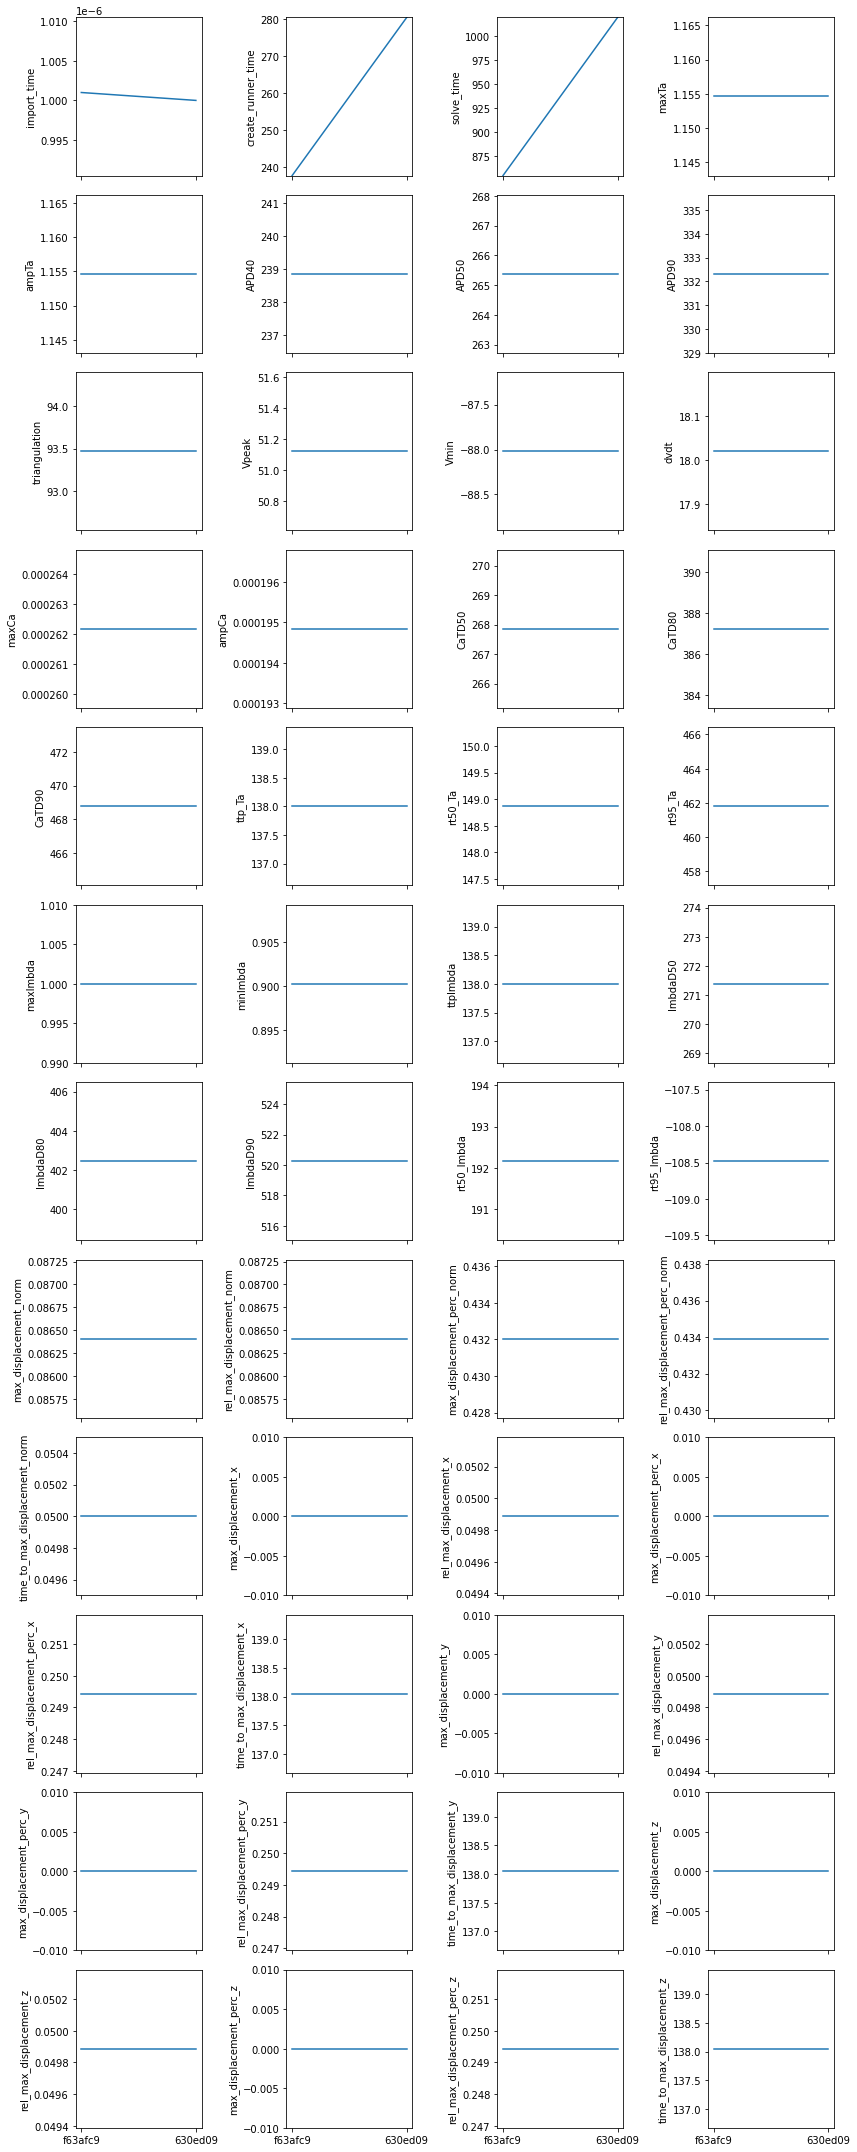

In [28]:
fig, axs = plt.subplots(12, 4, sharex=True, figsize=(12, 30))
for i, (biomarker, values) in enumerate(results.items()):
    ax = axs.flatten()[i]
    y = [x for _, x in sorted(zip(timestamps, values), key=lambda pair: pair[0])]
    ax.plot(hashes, y)
    ax.set_ylabel(biomarker)
    ylim = get_ylim(values)
    ax.set_ylim(*ylim)
fig.tight_layout()
plt.show()